# The Stroop Effect

What follows is a verification of the Stroop effect, a classical finding in psychology. It shows that people consistently take longer to name the color of a word if the word and color of the word do not match. For example, <span style='color:blue'> RED </span> takes longer to identify as blue than <span style='color:blue'> BLUE </span> as blue.

We have two variables. The independent variable is the word condition; it is either congruent (i.e., color name matches word color) or incongruent. The dependent variable is the performance time, in second, to complete each condition.

## Hypotheses
*Null hypothesis*: the performance time of the population will not be affected by the word condition. That is, 
$$\mu_C=\mu_I$$ 

where $\mu_C$ is the mean of the response times under the congruent condition and $\mu_I$ is the mean of the response times under the incongruent condition.

*Altnerative hypothesis*: the performance time of the population will significantly decrease under the incongruent word condition. That is, 
$$\mu_C<\mu_I$$

## Experiment
Each subject will perform under both conditions and the population parameters are unknown. This experiment uses paired dependent samples in a within-subject design.

## Test
A [t-test](http://socialresearchmethods.net/kb/stat_t.php) is appropriate to assess whether the difference in means is statistically significant. Recall that a t-test evaluates the difference in means relative to each group's variation in scores. It [assumes](https://en.wikipedia.org/wiki/Student%27s_t-test#Assumptions):
* the samples are independent
* the populations follow a normal distribution (although, this test is robust to non-normal populations as well)
* the populations have the same variance
* the two samples were chosen independently of the two populations (e.g., the participants were clustered, then sampled)

## Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')
# code from: https://www.reddit.com/r/IPython/comments/3lpwl9/easiest_way_to_hide_your_input_in_code_cells/

In [9]:
data = pd.read_csv("stroopdata.csv")
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


## Descriptive Statistics
Let us view some common summary statistics.

In [10]:
print(data.describe())
print("IQR    ", 
      "{0:.2f}".format(data['Congruent'].quantile(0.75) - data['Congruent'].quantile(0.25)),
      " " * 7,
      "{0:.2f}".format(data['Incongruent'].quantile(0.75) - data['Incongruent'].quantile(0.25)))

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000
IQR     4.31         5.33


Eyeballing the data, we can see that the means (14 < 22) and standard deviations (3.6 < 4.8) differ, but a t-test should be applied to verify that the differences are significant. Before that, let's view some visual summaries of the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245167B6B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002451682B390>]], dtype=object)

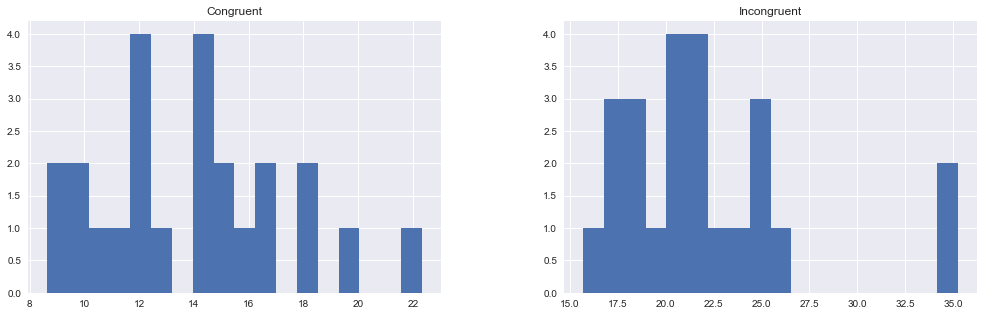

In [11]:
data.hist(bins=18, figsize=(17,5))

The distributions look mostly normal, excepting two outliers in the incongruent condition. The difference in means is affected by those outliers, so the difference in medians (the 50% statistic above, 14.3 < 21.0) is a better measure of central tendency.

## Test and Results

In [23]:
print(stats.ttest_ind(data['Congruent'], data['Incongruent'], equal_var=False))

cohens_d = (data['Congruent'].mean() - data['Incongruent'].mean()) / \
            (np.sqrt((data['Congruent'].std() ** 2 + data['Congruent'].std() ** 2) / 2))
# cohen's d calculation based on: https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python#33002123
print("Effect size via Cohen's D: ", cohens_d)


Ttest_indResult(statistic=-6.5322505539032285, pvalue=6.5101673904426379e-08)
Effect size via Cohen's D:  -2.2377045977


-1.6103958962164739

The t-statistic is -6.53. It's negative because I subtracted the congruent values, which are smaller, by the incongruent values.
The p-value is 0.00000006, which is less than 0.0001, so there's about a 6 in 100,000,000 chance that this result is merely due to chance. Degrees of freedom is 23 (total persons minus one). _Side note: If the groups had contained different people, then the degrees of freedom would have been 46 (total persons minus number of groups)._ Given that the p-value is less than 0.001 and 23 degrees of freedom, the [critical statistic](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg) is 3.485.  

The difference in performance between the groups is statistically significant (i.e., there is a measured difference that is unlikely due to chance), but is it meaningful? Is it a tiny difference without much impact or something more? I chose to answer this with Cohen's D because the groups are the same size and the population variance is assumed to be equal. I computed a large effect size in -2.2. This number can be [interpreted](http://rpsychologist.com/d3/cohend/) several ways:
* about 99% of the people will have a faster performance time under the congruent condition (i.e., the control) than under the incongruent condition (i.e., the treatment).
* Less than 1/3 of the performance times will overlap. In other words, slow control performance and fast treatment performance have a 1/3 chance of overlapping.
* about 94% of the time, a person chosen at random from the control group will have a faster time than a random person from the treatment group.
* we'd only need to add 1-2 more people to the experiment in order to get another slower time under the treatment compared to the control.

## Conclusion

The absolute value of the t-statistic is greater than the absolute value of the t critical value and the p-value imples that this outcome was likely not due to chance. We can reject the null hypothesis. The performance time of the subjects under the congruent condition is significantly lower than their performance under the incongruent condition.

This result is expected from a perusal of the sample data and consistent with the intuition that human brains will slow down in order to resolve the conflicting information input of the observed color and the printed color name.

[Four theories](https://en.wikipedia.org/wiki/Stroop_effect#Theories) are common, but parallel distributed processing theory most resonates with me. The conscious recognition of words is used and strengthened more often than the conscious recognition of colors. Therefore, the brain’s initial impulse is to consider the word before the color. The conscious then recalls the goal of the task, inhibits the initial response, and falls back to the weaker processing pathway. The opportunity cost of processing the word before the color explains the increased processing time in the task.

A similar effect is expected any time the brain must rely upon a weak processing pathway to overcome a dominant processing pathway. The [numerical Stroop](https://en.wikipedia.org/wiki/Numerical_Stroop_effect) is an example, which experiments with the relationship between numbers and physical sizes associated with them. For example, the number 4 is expected to have a larger physical size than the number 3 . If <font size="5"> 3 </font> is physically larger than <font size="3"> 4 </font>, then the brain requires additional time to use the weaker conscious processing pathway for responding to physical size.

